In [1]:
#Local Imports
from classifyhyspecmoon.neuralnetdata import NeuralNetData
from classifyhyspecmoon.buildNN import run_mlp,MyHyperParameters

Thank you for using ClassifyHySpecMoon by z-vig!



In [2]:
#Remote Imports
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.font_manager as fnt_mang
import numpy as np

Loaded in data of shape: (239, 584, 408)
Reminder: (bands,ydimension,xdimension)


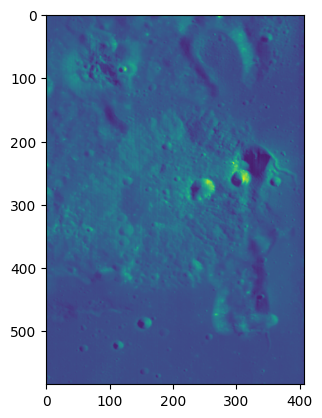

In [3]:
#Getting Raw Spectral Data
mydata = NeuralNetData('C:/Users/zvig/.julia/dev/JENVI.jl/Data/targeted.hdf5')
print(f'Loaded in data of shape: {mydata.smoothspec.shape}')
print(f'Reminder: (bands,ydimension,xdimension)')
plt.imshow(mydata.smoothspec[1,:,:])

(584, 408)


c:\Users\zvig\Desktop\python_code\ClassifyHySpecMoon\classifyhyspecmoon\create_labels.py:23: RuntimeWarning: invalid value encountered in arccos
  spa = 180*np.arccos(np.einsum('ijk,ijk->ij',M,I)/(np.linalg.norm(M,axis=2)*np.linalg.norm(I,axis=2)))/np.pi


3


Text(0.5, 1.0, 'Reference Spectrum')

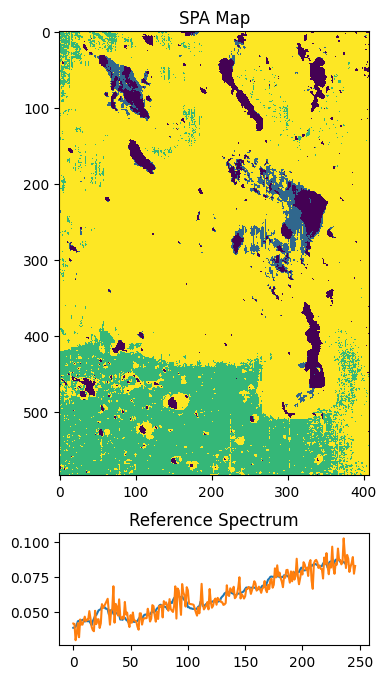

In [4]:
#Creating data labels for neural net validation
refspec1 = mydata.smoothspec[:,200,280] #olivine
refspec2 = mydata.smoothspec[:,500,200] #mare
refspec_raw = mydata.rawspec[:,200,280]
refspec_dict = {'Olivine':(refspec1,5),'Mare':(refspec2,1)} #Dictionary of tuples {str:(array,threshold)}
mydata.label_data('Spectral_Angle',refspec_dict)

fig,[ax11,ax12] = plt.subplots(2,1,height_ratios=[4,1],figsize=(4,8))
ax11.imshow(mydata.labeled_data,interpolation='none')
ax11.set_title('SPA Map')
ax12.plot(refspec1)
ax12.plot(refspec_raw)
ax12.set_title('Reference Spectrum')

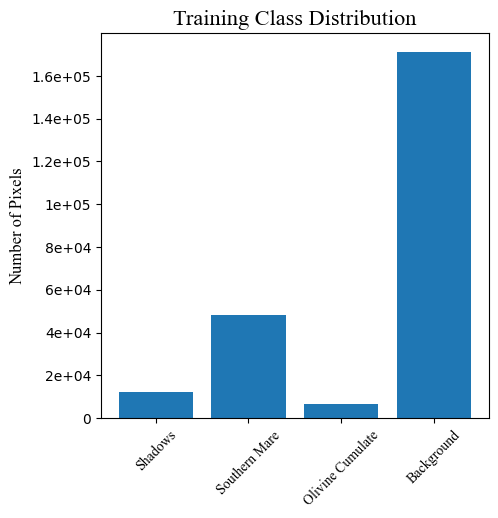

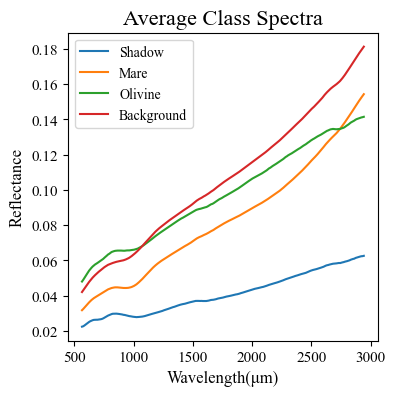

In [5]:
#Visualing binary labels
shadows = mydata.smoothspec[:,mydata.labeled_data==0]
mare = mydata.smoothspec[:,mydata.labeled_data==2]
olivine = mydata.smoothspec[:,mydata.labeled_data==1]
background = mydata.smoothspec[:,mydata.labeled_data==3]

nshad = shadows.shape[1]
nback = background.shape[1]
nol = olivine.shape[1]
nmar = mare.shape[1]

fancyfont = {'fontname':'Times New Roman'}
font = fnt_mang.FontProperties(family='Times New Roman',style='normal',size=10)

fig1,ax1 = plt.subplots(1,1,figsize=(5,5))
ax1.bar([1,2,3,4],[nshad,nmar,nol,nback])
ax1.set_xticks([1,2,3,4],['Shadows','Southern Mare','Olivine Cumulate','Background'],rotation=45,**fancyfont,fontsize=10)
ax1.set_title('Training Class Distribution',**fancyfont,fontsize=16)
ax1.set_ylabel('Number of Pixels',**fancyfont,fontsize=12)
# ax1.set_yscale('log')
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2g}'))

fig2,ax21 = plt.subplots(1,1,figsize=(4,4))
ax21.plot(mydata.wvl,np.mean(shadows,axis=1),label='Shadow')
ax21.plot(mydata.wvl,np.mean(mare,axis=1),label='Mare')
ax21.plot(mydata.wvl,np.mean(olivine,axis=1),label='Olivine')
ax21.plot(mydata.wvl,np.mean(background,axis=1),label='Background')
ax21.legend(prop=font)

ax21.set_xlabel('Wavelength(\u03bcm)',**fancyfont,fontsize=12)
ax21.set_ylabel('Reflectance',**fancyfont,fontsize=12)
ax21.set_title('Average Class Spectra',**fancyfont,fontsize=16)
ax21.set_xticks(np.arange(500,3500,500),labels=np.arange(500,3500,500),**fancyfont,fontsize=11)
ax21.set_yticks(np.arange(0.02,0.2,0.02),labels=np.arange(0.02,0.2,0.02),**fancyfont,fontsize=11)
ax21.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}'))
# plt.savefig('G:/My Drive/Machine Learning Project/Figures/class_distribution.svg',transparent=True,bbox_inches='tight',pad_inches=2)
plt.savefig('G:/My Drive/Machine Learning Project/Figures/class_averages.svg',transparent=True,bbox_inches='tight',pad_inches=1)

In [6]:
hyperparams = MyHyperParameters(10,[10]*10,0.01)

model = run_mlp(mydata,hyperparams)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                2382730   
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                

(100, 1)
[[8.79862178]
 [4.82184682]
 [8.99662333]
 [4.4839264 ]
 [0.53569958]
 [1.1170146 ]
 [4.11314119]
 [8.70413808]
 [0.369427  ]
 [9.69486607]] [[0.90660908]
 [0.49221911]
 [0.92724135]
 [0.45700695]
 [0.04559176]
 [0.10616625]
 [0.41837019]
 [0.89676365]
 [0.02826573]
 [1.        ]]
